In [1]:
import Pkg

In [2]:
Pkg.add("Tensors")

    Updating registry at `~/.julia/registries/General`
   Resolving package versions...
   Installed Tensors ─ v1.6.0
   Installed SIMD ──── v3.3.1
    Updating `~/.julia/environments/v1.6/Project.toml`
  [48a634ad] + Tensors v1.6.0
    Updating `~/.julia/environments/v1.6/Manifest.toml`
  [fdea26ae] + SIMD v3.3.1
  [48a634ad] + Tensors v1.6.0
Precompiling project...
  ✓ SIMD
  ✓ Tensors
  2 dependencies successfully precompiled in 12 seconds (216 already precompiled)


In [3]:
Pkg.add("ITensors")

   Resolving package versions...
   Installed Lz4_jll ───────────────── v1.9.3+0
   Installed Blosc ─────────────────── v0.7.0
   Installed SerializedElementArrays ─ v0.1.0
   Installed TupleTools ────────────── v1.3.0
   Installed Strided ───────────────── v1.1.2
   Installed ExprTools ─────────────── v0.1.6
   Installed KrylovKit ─────────────── v0.5.3
   Installed HDF5_jll ──────────────── v1.12.0+1
   Installed Indexing ──────────────── v1.1.1
   Installed Blosc_jll ─────────────── v1.21.0+0
   Installed TimerOutputs ──────────── v0.5.12
   Installed Dictionaries ──────────── v0.3.11
   Installed PackageCompiler ───────── v1.3.0
   Installed HDF5 ──────────────────── v0.15.6
   Installed ITensors ──────────────── v0.2.6
    Updating `~/.julia/environments/v1.6/Project.toml`
  [9136182c] + ITensors v0.2.6
    Updating `~/.julia/environments/v1.6/Manifest.toml`
  [a74b3585] + Blosc v0.7.0
  [85a47980] + Dictionaries v0.3.11
  [e2ba6199] + ExprTools v0.1.6
  [f67ccb44] + HDF5 v0.15.6


In [5]:
using ITensors




In [6]:
function HHeisdmrg(N, Jxy=1, Jz=1, Nsweep=5, Bonddim=10, truncerr=1E-10)
  sites = siteinds("S=1/2",N)

  ampo = OpSum()
  for j=1:N-1 
    ampo += Jz , "Sz",j,"Sz",j+1
    ampo += Jxy, "Sx",j,"Sx",j+1
    ampo += Jxy, "Sy",j,"Sy",j+1
  end
H = MPO(ampo,sites)
psi0 = randomMPS(sites,10)

  sweeps = Sweeps(Nsweep)
  setmaxdim!(sweeps, Bonddim)
  setcutoff!(sweeps, truncerr)

  energy, psi = dmrg(H,psi0, sweeps)

  return energy, psi
end

HHeisdmrg (generic function with 6 methods)

In [7]:

Jxy=1
Jz=1
truncerr=1E-12
nsweep = 10
bondlist = 1:2:10
e0s = []

Any[]

In [10]:
for bonddim in bondlist
    e0, psi = HHeisdmrg(5, Jxy, Jz, nsweep, bonddim, truncerr)
    append!(e0s,e0)
end



After sweep 1 energy=-1.308987080293 maxlinkdim=1 maxerr=2.76E-01 time=23.946
After sweep 2 energy=-1.309014618725 maxlinkdim=1 maxerr=2.76E-01 time=0.003
After sweep 3 energy=-1.309016765741 maxlinkdim=1 maxerr=2.76E-01 time=0.003
After sweep 4 energy=-1.309016971914 maxlinkdim=1 maxerr=2.76E-01 time=0.003
After sweep 5 energy=-1.309016992164 maxlinkdim=1 maxerr=2.76E-01 time=0.003
After sweep 6 energy=-1.309016994157 maxlinkdim=1 maxerr=2.76E-01 time=0.003
After sweep 7 energy=-1.309016994354 maxlinkdim=1 maxerr=2.76E-01 time=0.004
After sweep 8 energy=-1.309016994373 maxlinkdim=1 maxerr=2.76E-01 time=0.004
After sweep 9 energy=-1.309016994375 maxlinkdim=1 maxerr=2.76E-01 time=0.004
After sweep 10 energy=-1.309016994375 maxlinkdim=1 maxerr=2.76E-01 time=0.007
After sweep 1 energy=-1.917317662770 maxlinkdim=3 maxerr=2.76E-03 time=0.509
After sweep 2 energy=-1.917340225921 maxlinkdim=3 maxerr=2.34E-03 time=0.003
After sweep 3 energy=-1.917340227613 maxlinkdim=3 maxerr=2.33E-03 time=0.0

In [13]:
e0s

5-element Vector{Any}:
 -1.309016994374927
 -1.9173402276154556
 -1.927886253317995
 -1.9278862533179937
 -1.9278862533179952

In [12]:

plot(bondlist,e0s/5)

LoadError: UndefVarError: plot not defined

In [14]:
Nlist = 7:10;
E0s=[]; 
for l in Nlist
    e0, psi = HHeisdmrg(l, Jxy, Jz, nsweep,5, truncerr)
    push!(E0s,real(e0)/l)
end 
E0p=[E0s[i][1] for i=1:length(Nlist)]

After sweep 1 energy=-2.835993285558 maxlinkdim=5 maxerr=1.29E-03 time=0.008
After sweep 2 energy=-2.836002144369 maxlinkdim=5 maxerr=3.70E-05 time=0.007
After sweep 3 energy=-2.836002145354 maxlinkdim=5 maxerr=3.68E-05 time=0.008
After sweep 4 energy=-2.836002145354 maxlinkdim=5 maxerr=3.68E-05 time=0.011
After sweep 5 energy=-2.836002145354 maxlinkdim=5 maxerr=3.68E-05 time=0.011
After sweep 6 energy=-2.836002145354 maxlinkdim=5 maxerr=3.68E-05 time=0.008
After sweep 7 energy=-2.836002145354 maxlinkdim=5 maxerr=3.68E-05 time=0.009
After sweep 8 energy=-2.836002145354 maxlinkdim=5 maxerr=3.68E-05 time=0.013
After sweep 9 energy=-2.836002145354 maxlinkdim=5 maxerr=3.68E-05 time=0.028
After sweep 10 energy=-2.836002145354 maxlinkdim=5 maxerr=3.68E-05 time=0.009
After sweep 1 energy=-3.372196257118 maxlinkdim=5 maxerr=2.03E-03 time=0.012
After sweep 2 energy=-3.372514417212 maxlinkdim=5 maxerr=3.97E-04 time=0.017
After sweep 3 energy=-3.372510508778 maxlinkdim=5 maxerr=3.97E-04 time=0.01

4-element Vector{Float64}:
 -0.40514316362201447
 -0.4215588858016296
 -0.4150526449177783
 -0.4253327558618573

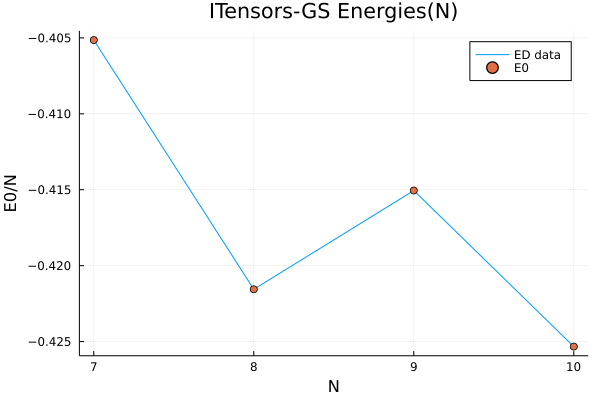

objc[2869]: Class RunLoopModeTracker is implemented in both /Users/cosmos/.julia/conda/3/lib/libQt5Core.5.9.7.dylib (0x16ff2fa80) and /Users/cosmos/.julia/artifacts/d594d9e68b9d104aaf1a41d933728d2dad54c869/lib/QtCore.framework/Versions/5/QtCore (0x17e768aa8). One of the two will be used. Which one is undefined.


In [6]:
Plots.plot(Nlist,E0p,label="ED data")
scatter!(Nlist,E0p,label="E0")
xlabel!("N")
ylabel!("E0/N")
title!("ITensors-GS Energies(N)")

In [15]:
Nlist = 7:10;
E0s=[]; 
for N in Nlist
    for bonddim in bondlist
        e0, psi = HHeisdmrg(N, Jxy, Jz, nsweep, bonddim, truncerr)
        push!(E0s,real(e0)/N)
    end
    
end 
E0p=[E0s[i][1] for i=1:length(Nlist)]

After sweep 1 energy=-1.802041073901 maxlinkdim=1 maxerr=4.16E-01 time=0.005
After sweep 2 energy=-1.808644376463 maxlinkdim=1 maxerr=2.76E-01 time=0.025
After sweep 3 energy=-1.808950484181 maxlinkdim=1 maxerr=2.76E-01 time=0.013
After sweep 4 energy=-1.808999600959 maxlinkdim=1 maxerr=2.76E-01 time=0.006
After sweep 5 energy=-1.809012153540 maxlinkdim=1 maxerr=2.76E-01 time=0.011
After sweep 6 energy=-1.809015634976 maxlinkdim=1 maxerr=2.76E-01 time=0.017
After sweep 7 energy=-1.809016612158 maxlinkdim=1 maxerr=2.76E-01 time=0.012
After sweep 8 energy=-1.809016886893 maxlinkdim=1 maxerr=2.76E-01 time=0.013
After sweep 9 energy=-1.809016964150 maxlinkdim=1 maxerr=2.76E-01 time=0.014
After sweep 10 energy=-1.809016985875 maxlinkdim=1 maxerr=2.76E-01 time=0.012
After sweep 1 energy=-2.808100296038 maxlinkdim=3 maxerr=2.74E-02 time=0.013
After sweep 2 energy=-2.809294400438 maxlinkdim=3 maxerr=4.61E-03 time=0.011
After sweep 3 energy=-2.809296534115 maxlinkdim=3 maxerr=4.60E-03 time=0.01

After sweep 8 energy=-2.309016498820 maxlinkdim=1 maxerr=2.76E-01 time=0.007
After sweep 9 energy=-2.309016771372 maxlinkdim=1 maxerr=2.76E-01 time=0.008
After sweep 10 energy=-2.309016894014 maxlinkdim=1 maxerr=2.76E-01 time=0.014
After sweep 1 energy=-3.689961646356 maxlinkdim=3 maxerr=8.48E-03 time=0.009
After sweep 2 energy=-3.690573185106 maxlinkdim=3 maxerr=6.02E-03 time=0.009
After sweep 3 energy=-3.690576500028 maxlinkdim=3 maxerr=6.02E-03 time=0.009
After sweep 4 energy=-3.690576545132 maxlinkdim=3 maxerr=6.02E-03 time=0.009
After sweep 5 energy=-3.690576545770 maxlinkdim=3 maxerr=6.02E-03 time=0.010
After sweep 6 energy=-3.690576545779 maxlinkdim=3 maxerr=6.02E-03 time=0.011
After sweep 7 energy=-3.690576545779 maxlinkdim=3 maxerr=6.02E-03 time=0.007
After sweep 8 energy=-3.690576545779 maxlinkdim=3 maxerr=6.02E-03 time=0.008
After sweep 9 energy=-3.690576545779 maxlinkdim=3 maxerr=6.02E-03 time=0.009
After sweep 10 energy=-3.690576545779 maxlinkdim=3 maxerr=6.02E-03 time=0.0

4-element Vector{Float64}:
 -0.25843099798219843
 -0.4013280778205015
 -0.4051431636220137
 -0.4051741679546292

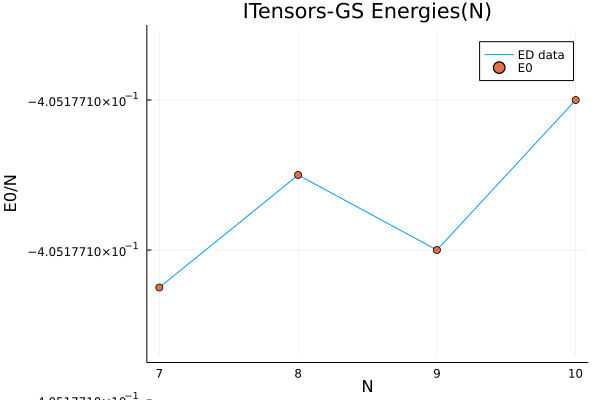

┌ Warning: No strict ticks found
└ @ PlotUtils /Users/cosmos/.julia/packages/PlotUtils/n4I4Q/src/ticks.jl:295
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/cosmos/.julia/packages/PlotUtils/n4I4Q/src/ticks.jl:295


In [132]:
Plots.plot(Nlist,E0p,label="ED data")
scatter!(Nlist,E0p,label="E0")
xlabel!("N")
ylabel!("E0/N")
title!("ITensors-GS Energies(N)")

In [16]:
E0s

20-element Vector{Any}:
 -0.25843099798219843
 -0.4013280778205015
 -0.4051431636220137
 -0.4051741679546292
 -0.4051770972409492
 -0.25737701643329947
 -0.40990662370621966
 -0.4215594803853162
 -0.42176221269705794
 -0.4218663165176989
 -0.2565574326682116
 -0.41006406064207845
 -0.41505264491777893
 -0.415135276429703
 -0.41514600086122777
 -0.25588263784570514
 -0.414304686460713
 -0.4253327601666556
 -0.4256381614446722
 -0.4258024412088031

In [1]:
e07=E0s[1:5]
e08=E0s[6:10]
e09=E0s[11:15]
e01=E0s[16:20]

LoadError: UndefVarError: E0s not defined

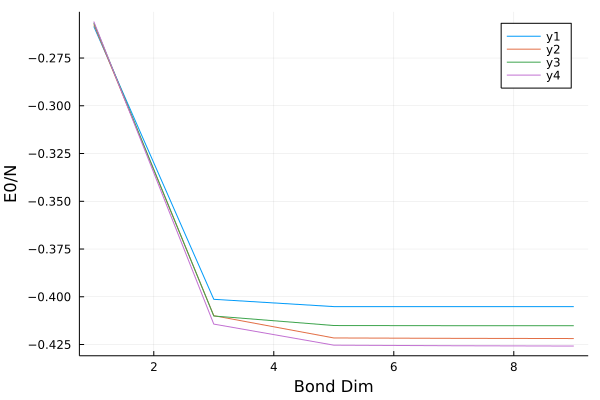

In [10]:
Plots.plot(bondlist,[e07,e08,e09,e01])
xlabel!("Bond Dim")
ylabel!("E0/N")

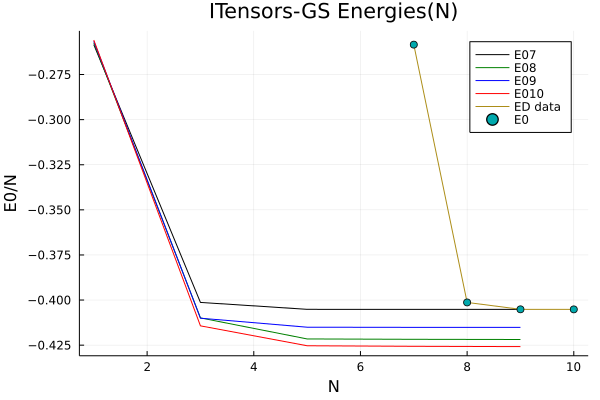

In [13]:
Plots.plot(bondlist, e07,colour = :black, label = "E07")
plot!(bondlist,e08,colour = :green, label = "E08")
plot!(bondlist, e09,colour = :blue,label = "E09")
plot!(bondlist,e01,colour = :red,label = "E010")
#xlabel!("Bond Dim")
#ylabel!("E0/N")
plot!(Nlist,E0p,label="ED data")
scatter!(Nlist,E0p,label="E0")
xlabel!("N")
ylabel!("E0/N")
title!("ITensors-GS Energies(N)")